#**PROJECT NAME- AIRBNB BOOKING ANALYSIS**

**Project Type:** EDA

**Contribution:** Indivudual

# Github Link

#Project Summary


#**Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

Airbnb is one of the leading platforms in the short-term rental market, connecting millions of travelers with hosts across the globe. As the platform continues to grow, understanding user behavior and the factors that influence bookings becomes essential for improving customer experience and maximizing revenue.

Despite having a vast amount of listings and user interactions, Airbnb faces key challenges such as:

1. *What features make a listing more likely to be booked?*

2. *How do pricing, location, and reviews impact guest decisions?*

3. *Why do some hosts consistently perform better than others?*

4. *Are there patterns in bookings based on time of year or geography?*

To address these concerns, a detailed analysis of Airbnb booking data is needed. This will help uncover trends, highlight areas for improvement, and support data-driven decisions for both Airbnb and its hosts.

**CONTENT OF THE AIRBNB ANALYSIS**

#1. Import the libraries

In [ ]:
#import the required libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Load the Dataset

In [ ]:
df=pd.read_csv('/content/Airbnb NYC 2019.csv')

#3.Dataset Overview

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#4. Dataset Shape

In [ ]:
df.shape

(48895, 16)

#5. Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#6. Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicated_values = df[df.duplicated()]
duplicated_values

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


**Here, we can see there is no direct duplicate values in the dataset. However, we need to check for other columns as well such as id and name as this values are not likely to be same.**

In [ ]:
# Dataset Duplicate Value Count for id
duplicated_values = df[df.duplicated('id')]
duplicated_values

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
# Now let us check for 'name' column.
duplicated_name = df[df.duplicated(subset=['name'])]
duplicated_name

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48684,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,NaN,NaN,2,177
48735,36412461,"Sunny, Cozy, Private Room In The Heart of Bush...",147515897,Flávia,Brooklyn,Bushwick,40.70366,-73.92728,Private room,84,3,0,NaN,NaN,1,28
48759,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,NaN,NaN,1,81
48791,36427922,Home away from home,238163900,Lucy,Queens,Cambria Heights,40.68557,-73.72731,Private room,50,3,0,NaN,NaN,1,176


**Here we can see that there are 989 rows that are having duplicate names, this might due to double reviews on different dates, which might be outdated. To find out, let us observe any one of the rows.**

In [ ]:
# We can check for any specific row having the name value included in the duplicated data, using the query command.
# Let's check for where name is 'Superior @ Box House', which is in our duplicated data.
df.query('name == "Superior @ Box House"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
682,253846,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73731,-73.95450,Private room,179,3,4,2015-12-04,0.05,28,81


Here we can observe that almost all the values are same except for the id, latitude, longitude, number_of_reviews, last_review,reviews_per_month, availability_365. However these columns can be different, and they are not so important

In [ ]:
# To tackle this issue we will create a new data frame in which we will include
# only those columns which are really important for us.
df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].copy()

Now that we have created this dataframe we will be able to handle duplicated values more efficiently

In [ ]:
# Let's check for the duplicated values of any other row.
df.query('name == "Loft w/ Terrace @ Box House Hotel"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
680,253839,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73783,-73.95259,Private room,249,3,3,2015-11-03,0.03,28,60


As we can see here each and every value is almost the same, except for the prices, there might be a chances that the prices were altered as per the market condition due however the hotel is the same.

In [ ]:
# In this case we will seek out the duplicated values for those columns which
# are concerning and may effect the data if duplicated.

# Checking for the values where - 'name', 'host_name','neighbourhood_group', 'neighbourhood', 'room_type' are duplicated.
df.loc[df.duplicated(subset= ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47876,35966653,"Bright, contemporary and best location",24232061,Tracy,Manhattan,Upper East Side,40.77297,-73.95530,Private room,122,10,0,NaN,NaN,3,306
48026,36039574,★Premier Queen Room with Balcony ★,270874051,Hotel Vetiver,Queens,Long Island City,40.75300,-73.93485,Private room,99,1,0,NaN,NaN,8,319
48207,36139806,"30 mins to Times Square!! 15 mins LGA, 25mins ...",260209224,Lotay,Queens,Jackson Heights,40.75077,-73.87020,Entire home/apt,67,2,0,NaN,NaN,3,134
48662,36372006,Very Clean Private Room Near Buses & Restauran...,118405437,PengYu,Queens,Woodhaven,40.69411,-73.86877,Private room,66,1,0,NaN,NaN,2,365


In [ ]:
# Let's check for any specific value.
df.query('name == "✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
579,219793,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71813,-73.98416,Entire home/apt,199,1,29,2015-06-03,0.31,2,162
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158


**In this now we can see that all the values are same except for last_review,availability_365 and reviews_per_month, which are not so important regarding duplicacy.**

**Now to drop the duplicated values we will sort out dataframe on the basis of latest entries, for which we need to have a timestamp in our dataset, in our dataset we can use the 'last_review' column as the timestamp for our dataset.**

In [ ]:
# Converting the 'last_review' column in a datetime format.
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
# Now let us sort the data by the last_review column
df = df.sort_values(by='last_review', ascending=False).reset_index(drop=True)

**As we can see there are few NA values in the datafrane in the date column,let's fill these values with the latest dates we are having in our dataframe.**

In [ ]:
# Replacing NA Values
df['last_review'].replace(np.nan,df['last_review'].max(), inplace=True)

# Let's sort the values again
df = df.sort_values(by='last_review', ascending=False).reset_index(drop=True)

/tmp/ipython-input-16-433497313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].replace(np.nan,df['last_review'].max(), inplace=True)


In [ ]:
# Dropping duplicated values
df = df.drop_duplicates(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'], keep='first').reset_index(drop=True)

# Now the duplicated columns have been dropped, let's check the current shape of our data frame.
df.shape # (48655, 14)

# Let's check if there are any duplicated values now

df[df.duplicated(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])] # No values

df.query('name == "✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿"') # The latest value shows up

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48036,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,2015-07-20,0.15,2,158


**We have successfully dropped the duplicate value, and now we have the latest value**

#7. Missing/Null Values

In [ ]:
# Missing Values/Null Values Count
null_values = df.isnull()
null_value_count = null_values.sum()

# Visualizing the missing values
null_value_count

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# To check the outliers we need to check the columns which are having numerical data.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.866200e+04,4.866200e+04,48662.000000,48662.000000,48662.000000,48662.000000,48662.000000,48662,38673.000000,48662.000000,48662.000000
mean,1.900484e+07,6.746247e+07,40.728926,-73.952196,152.658173,7.002219,23.337738,2018-11-30 01:10:55.903990784,1.374940,6.989478,112.325079
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.462062e+06,7.802407e+06,40.690000,-73.983068,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.190000,1.000000,0.000000
50%,1.965763e+07,3.070801e+07,40.722985,-73.955660,105.000000,2.000000,5.000000,2019-06-14 00:00:00,0.720000,1.000000,44.000000
75%,2.913386e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,2.020000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098022e+07,7.851441e+07,0.054569,0.046098,240.418499,20.535357,44.628214,NaN,1.680639,32.484620,131.417220


If we look into this data we can see that the price and the minimum_nights columns are the most concerning ones, in these 2 columns we need to find the outliers and drop them.

In [ ]:
# As we see above the column_name 'calculated_host_listings_count' is quiet long
# Let's change it to 'listings'
df.rename(columns={
    "calculated_host_listings_count": 'listings'
}, inplace=True)

# Lets check the price columns once
df['price'].describe()

# As we can see the min price is 0 which is not likely to happen.
# According to the current website the price range starts from $25.
# In this case we will check for the prices which are below $25 and we will
# replace their values with 25 so that we can handle the outliers in price column.

df['price'] = df['price'].apply(lambda x: 25 if x < 25 else x)
 # replacing values
df['price'].describe()

,price
count,48662.000000
mean,152.679791
std,240.406397
min,25.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


As the few price values were less than $25, which is not likely to happen, we have converted those values into 25, so that we may handle the outliers more efficiently, as there was other crucial info present in those rows.


In [ ]:
# Now let's check the minimum_nights column.
df['minimum_nights'].describe()

# As the minimum value in this column is 1, we can work on only the upper limit.
# In this case if any value is more than 365 days, we will mark it as 365.

df.loc[df['minimum_nights'] > 365, 'minimum_nights'] = 365
 # replacing values
df['minimum_nights'].describe()

,minimum_nights
count,48662.000000
mean,6.914821
std,17.543710
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,365.000000


Now we have modified the outliers, we can move ahead with our dataset ready to be wrangled for deriving insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48662 entries, 0 to 48661
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   48662 non-null  int64         
 1   name                 48646 non-null  object        
 2   host_id              48662 non-null  int64         
 3   host_name            48641 non-null  object        
 4   neighbourhood_group  48662 non-null  object        
 5   neighbourhood        48662 non-null  object        
 6   latitude             48662 non-null  float64       
 7   longitude            48662 non-null  float64       
 8   room_type            48662 non-null  object        
 9   price                48662 non-null  int64         
 10  minimum_nights       48662 non-null  int64         
 11  number_of_reviews    48662 non-null  int64         
 12  last_review          48662 non-null  datetime64[ns]
 13  reviews_per_month    38673 non-

In [ ]:
df.shape

(48662, 16)

#What do you know about the dataset?

This is the dataset of Airbnb booking Industry,and the analysis is to identify patterns in user preferences, location trends, and listing features to improve booking rates and host performance.
The goals of this analysis is to:
1. *Identify key factors (like price, room type, and reviews) that influence booking decisions.*

2. *Analyze location trends to understand which neighborhoods or cities attract more bookings.*

3. *Evaluate host performance and listing characteristics that lead to higher occupancy.*

4. *Provide data-driven insights to optimize listings and improve booking rates.*

This Dataset consist of 48895 rows and 16 columns and i had replaced all the missing and null values in the dataset. There are no duplicate values in the dataset.

#8. Understanding the variables

In [ ]:
# Dataset Columns
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'listings',
 'availability_365']

There are basically 3 types of variables according to their roles:-

1. Numerical Variables: These variables represent quantitative data and can be further categorized into:-

Continuous Variables: These variables can take any value within the given number of range.

Discrete Variables: These variables are having a specific value and are related to a specific identity.

2. Categorical Variables: These variables represent qualitative data and can be further categorized into:-

Nominal Variables: These variables are random and they do not follow any order or ranking.

Ordinal Variables: These variables are according to an order they can be ranked as well.

Time Variables: These variables are basically date and time variables having a timestamp.

In [ ]:
# Dataset Describe
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365
count,4.866200e+04,4.866200e+04,48662.000000,48662.000000,48662.000000,48662.000000,48662.000000,48662,38673.000000,48662.000000,48662.000000
mean,1.900484e+07,6.746247e+07,40.728926,-73.952196,152.679791,6.914821,23.337738,2018-11-30 01:10:55.903990784,1.374940,6.989478,112.325079
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,25.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.462062e+06,7.802407e+06,40.690000,-73.983068,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.190000,1.000000,0.000000
50%,1.965763e+07,3.070801e+07,40.722985,-73.955660,105.000000,2.000000,5.000000,2019-06-14 00:00:00,0.720000,1.000000,44.000000
75%,2.913386e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,2.020000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098022e+07,7.851441e+07,0.054569,0.046098,240.406397,17.543710,44.628214,NaN,1.680639,32.484620,131.417220


#Variables Description
As we can see that we are having various outputs that can be studied so as to attain certain measures and draw conclusions on the basis of the data. For example: we have a wide range of prices available, however the average price range prefered by the customers are around 150, which gives us an idea on the budget of the guests and their preference.

#Check the Unique values for each variable

In [ ]:
# Check Unique Values for each variable.
def unique_value(df):
  for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")


#9. Data Wrangling

As our Data cleaning, Data transformation, and Handling outliers has been completed, now we will be working on "Feature Engineering"

##Data Wrangling Code

In [ ]:
# Let's create a new column with the price range distribution.
# We will use it while working with the price column.
start = 0
end = 10000
breakpoints = np.linspace(start, end, num=101)
breakpoints = breakpoints.astype(int)
def price_range(amt):
    bp = breakpoints
    for i in range(len(breakpoints)-1):
        if bp[i] <= amt <= bp[i+1]:
            return f"{bp[i]} - {bp[i+1]}"


df['price_range'] = df['price'].apply(lambda amt: price_range(amt))
df['price_range']

,price_range
0,0 - 100
1,0 - 100
2,200 - 300
3,0 - 100
4,100 - 200
...,...
48657,0 - 100
48658,100 - 200
48659,0 - 100
48660,200 - 300


Creating this price range column can provide us these benefits:-

* Data Summarization: As this will provide an effective summary of the price
distribution in our dataset.
Visualization: on a price range instead of individual price column is much more effective.
* Segmentation and Analysis: As it will divide the prices into different segments it would be really easy to compare the prices into different segments or ranges.
* Decision Making: It can help us in various decisions making, into different scenarios, like we can use this info to provide recommendations to the customers according to their budget and requirements.
* Communicating Insights: Price range can easily communicate the budget and preferences of our customers and it can also tell us where does the majority of our cutomers lies, according to their purchasing power.

In [ ]:
# Let's take a look at our dataset once.
df.head()

# As we can see our dataset is sorted according to the last review, let us sort our dataset according to the price.
df.sort_values(by='price', ascending=False, inplace=True)

# Let's take a look at our price sorted dataset once.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365,price_range
42906,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,9900 - 10000
1809,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2019-07-08,NaN,1,83,9900 - 10000
46635,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,9900 - 10000
46974,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,9900 - 10000
9953,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-07-08,NaN,1,365,9900 - 10000


In [ ]:
list[(df.columns)]

list[Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings', 'availability_365', 'price_range'],
      dtype='object')]

We can consider these columns to be our features so that we can work with these:-

* id
* host_id
* neighbourhood_group
* neighbourhood
* room_type
* price
* price_range
* minimum_nights
* number_of_reviews
* reviews_per_month
* listings
* availability_365

In [ ]:
# Let filter the dataframe with only the required columns.
feature_df = df[['id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'listings',
       'availability_365', 'price_range']]

feature_df = feature_df.reset_index(drop=True)
feature_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listings,availability_365,price_range
0,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.16,1,0,9900 - 10000
1,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,Entire home/apt,10000,30,0,NaN,1,83,9900 - 10000
2,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,Private room,10000,100,2,0.04,1,0,9900 - 10000
3,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,Private room,9999,99,6,0.14,1,83,9900 - 10000
4,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,Entire home/apt,9999,30,0,NaN,1,365,9900 - 10000


In [ ]:
feature_df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listings,availability_365,price_range
0,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.16,1,0,9900 - 10000
1,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,Entire home/apt,10000,30,0,NaN,1,83,9900 - 10000
2,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,Private room,10000,100,2,0.04,1,0,9900 - 10000
3,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,Private room,9999,99,6,0.14,1,83,9900 - 10000
4,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,Entire home/apt,9999,30,0,NaN,1,365,9900 - 10000


As we can see we are having few groups in our datasets, let us check what all insights we can derive from them, by seeking information according to the groups.

In [ ]:
# Let's check the top performing Host as per the total listing count
host_groups = feature_df.groupby('name')
hosts = []
no_of_listings = []
host_prices = []
for host, data in host_groups:
  hosts.append(host)
  no_of_listings.append(data['listings'].sum())
  host_prices.append(data['price'].mean())

host_df = pd.DataFrame({
    'Host Name': hosts,
    'Total Listings': no_of_listings,
    'Price': host_prices
})
host_df = host_df.sort_values(by='Total Listings', ascending=False).reset_index(drop=True)
host_df = host_df.drop_duplicates(subset='Total Listings').reset_index(drop=True)
top_10_hosts = host_df.head(10)

host_df['Revenue'] = (host_df['Total Listings'])*(host_df['Price'])
top_host_revenue = host_df.sort_values(by='Revenue', ascending=False).reset_index(drop=True)
top_host_revenue.head(10)

,Host Name,Total Listings,Price,Revenue
0,Pleasant 1BR in Midtown East by Sonder,654,197.000000,128838.0
1,Sonder | Stock Exchange | Cozy 1BR + Lounge,327,229.000000,74883.0
2,"West 55th street, Lux 1bd Serviced Apartment",261,251.666667,65685.0
3,"Gorgeous + Bright Midtown East 1BR, Doorman, G...",232,241.000000,55912.0
4,*NO GUEST SERVICE FEE* Beekman Tower One Bedro...,49,714.000000,34986.0
5,West 15th Street Cozy Chelsea 1bd Serviced Apt,174,200.000000,34800.0
6,"Stunning 1 Bedroom Apt. in NYC, w/d in the unit!",121,239.000000,28919.0
7,2BR WITH PRIVATE PATIO EAST VILLAGE,114,249.000000,28386.0
8,DOORMAN/ GYM/ MODERN 2 BR ON EAST 52ND ST,65,385.000000,25025.0
9,Prime Location One Bed Doorman Gym Deck!5223,96,250.000000,24000.0


In [ ]:
# First let's check how many neighbourhood_groups are there.
feature_df['neighbourhood_group'].unique() # There are 5 different groups.

# ['Brooklyn', 'Queens', 'Manhattan', 'Staten Island', 'Bronx']
#  let's group our dataset according to the neighbourhood groups.

n_groups = feature_df.groupby('neighbourhood_group')

# Let's check which group is most prefered as per the listings, and no. of reviews.
groups = [] # To save the groups
listings = []
reviews = []
max_price = []
min_price = []
for group, data in n_groups:
  groups.append(group)
  listings.append(data['listings'].sum())
  reviews.append(data['number_of_reviews'].sum())
  max_price.append(data['price'].max())
  min_price.append(data['price'].min())

group_feat_df = pd.DataFrame({
    'Group': groups,
    'Listing Count': listings,
    'No._of_reviews': reviews,
    'Min Price': min_price,
    'Max Price': max_price
})

group_feat_df
# Here we can see that Manhattan group is the most prefered group as per the listings.
# However the most reviews are given to the Brooklyn group.

# Now let's divide our dataset as per the room types, and create their groups.
# First let's check how room_types are there.

feature_df['room_type'].unique() # There are 3 room types.

# ['Entire home/apt', 'Private room', 'Shared room']
#  let's group our dataset according to the room types.

room_groups = feature_df.groupby('room_type')
rooms = []
room_listings = []
room_reviews = []
max_room_price = []
min_room_price = []
for room_type, room_data in room_groups:
    rooms.append(room_type)
    room_listings.append(room_data['listings'].sum())
    max_room_price.append(room_data['price'].max())
    min_room_price.append(room_data['price'].min())

room_feat_df = pd.DataFrame({
    'Group': rooms,
    'Listing Count': room_listings,
    'Min Price': min_room_price,
    'Max Price': max_room_price
})

room_feat_df
# Here we can see the most prefered room type is the Entire home/apt.
# The most reviews are also given to the Entire home/apt.
# Shared rooms are the least prefered.

,Group,Listing Count,Min Price,Max Price
0,Entire home/apt,263986,25,10000
1,Private room,70813,25,10000
2,Shared room,5323,25,1800


In [ ]:
# Now let us check how many different neighbourhoods are there in total.
feature_df['neighbourhood'].count() # There are 48655 neighbourhoods

# Now let us check what are the top 10 most prefered neighbourhoods.
# Also, let's check their average pricing and average price range.
area_groups = feature_df.groupby('neighbourhood')
areas = []
listing_count = []
avg_price = []
for area, n_data in area_groups:
  areas.append(area)
  listing_count.append(n_data['listings'].sum())
  avg_price.append(round(n_data['price'].mean(), 2))

area_feat_df = pd.DataFrame({
    'Area': areas,
    'Listing Count': listing_count,
    'Average Price': avg_price,
})

area_feat_df = area_feat_df.sort_values(by='Listing Count', ascending=False).reset_index(drop=True)
area_feat_df.head(10)

,Area,Listing Count,Average Price
0,Financial District,84942,226.03
1,Hell's Kitchen,24754,205.33
2,Murray Hill,24726,221.18
3,Midtown,24647,282.66
4,Chelsea,17483,248.36
5,Theater District,16151,242.67
6,Upper East Side,14909,189.10
7,Upper West Side,13201,211.25
8,Bedford-Stuyvesant,9605,107.77
9,Tribeca,7519,492.23


In [ ]:
# Let us now work with relationships.
# Relationship: Price vs. Room Type
# Checking the distribution of prices for different room types.
# "room_groups" is our grouped dataframe we will be using this.

avg_room_price = []
for room, data in room_groups:
  avg_room_price.append(data['price'].mean())

room_vs_price = pd.DataFrame({
    'Room Type': rooms,
    'Avg_Price': avg_room_price
})

room_vs_price

# As we can see here the Entire home/apt is having the highest pricing.

,Room Type,Avg_Price
0,Entire home/apt,211.692566
1,Private room,89.631218
2,Shared room,70.536395


In [ ]:
# Relationship: Reviews per Month vs. Room Type
# Comparing the distribution of reviews per month for different room types.

total_reviews = []
for room, data in room_groups:
  total_reviews.append(data['reviews_per_month'].sum())

room_vs_reviews = pd.DataFrame({
    'Room Type': rooms,
    'Reviews': total_reviews
})

room_vs_reviews
# As we can see here the Entire home/apt is having the highest no. of reviews per month.

,Room Type,Reviews
0,Entire home/apt,26525.13
1,Private room,25415.29
2,Shared room,1232.65


# What all manipulations have you done and insights you found?
This dataset was having good amount of well distributed information, which was a plus point for our study. As this dataset if of Airbnb, the locations play a very crucial role in these values and the inforamtion was distributed well as per the locations and their respective areas.

We have done number of manipulations to seek information which can be beneficial for the stake holders to make decisions for the business, not only that our hosts will also get good idea about the preferences of their customers, as we promised in our agenda.

We divided the complete manipulation into 2 major parts, as per the features and the relationships, so that we can draw insights accordingly.

These are the manipulations we followed:-

* Created a new price range column: As this columns will help us to categorize the price distribution and to simplify the judgement for us to get an idea of the budget of our customer, we have tried to keep it as precise as possible.

* Sorted the dataset as per price: As the data wasn't sorted and was not having any significance regaring any value, we sorted it as per the pricing, keep the most expensive ones on the top.

* We filtered the data so that it becomes simple and easy to understand(less chaotic) for us to work only with those columns that are required for the data analysis and feature engineering.

* Divided the data according to the categorical groups to derive insights accordingly, it helped us to identify the outcomes in a structed manner with respect to the considered groups, it provided us with more specific information about the different groups we created so that we can identify insights for each group individually. These are the diferent groups we created and worked with:-

* Created Nighbourhood Group: This group helped us to get an idea of which neighbourhood is the most prefered one in all of the neighbourhoods.

* Created room type groups: This group helped us to identify which room type is the most prefered by our customers.

* Created Neighbourhood area groups: This group helped us to identify which is the most prefered area within the neighbourhoods.

We also worked on few of the relationships that helped us in few comparisons that will help our stake holders to make decisions accordingly. These are the relationships we worked with:-

* Relationship: Price vs. Room Type

Checked the distribution of prices for different room types.
Determined which room type is having the most expensive price distribution.
Relationship: Reviews per Month vs. Room Type

* Compared the distribution of reviews per month for different room types.
Explored the level of engagement and satisfaction of our customers as per different room types.
Relationship: Price vs. Neighbourhood

* Compared the distribution of prices across different neighbourhoods.
Identified neighbourhoods with higher or lower average prices and explored price variations as per the areas.
These are the manipulations that we did in order to derive useful information so that it can contribute into the growth of our business and also the busniness of our hosts, and ultimately grow and improve tavelling experience for our customers.

The specifilly derived insights will be mentioned with the visualisations so that it would be better to understand and visualize at the same time.

#10. Data Vizualization, Storytelling & Experimenting with charts.

**Chart 1**

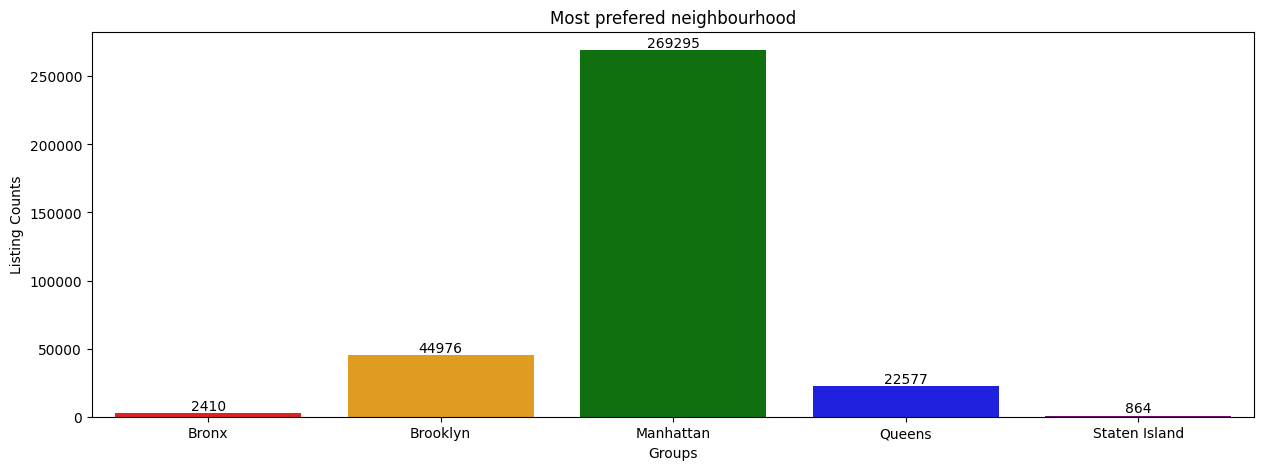

In [ ]:
# Chart - 1 visualization code
# Let's visualize the most prefered neighbourhood group with a bar chart

group_feat_df # As we have already created a dataframe for the groups

plt.figure(figsize=(15,5))
# plt.plot(groups,listings, color='black', marker = "o", markerfacecolor = 'blue', markeredgecolor='blue',linestyle='-')
colors = ['red', 'orange', 'green', 'blue', 'purple'] # To make each bar with a different color
sns.barplot(x="Group", y='Listing Count', data=group_feat_df, hue='Group', palette=colors, legend=False)
plt.xlabel('Groups')
plt.ylabel('Listing Counts')
plt.title('Most prefered neighbourhood')
for x, y in zip(range(len(groups)), listings):
    plt.text(x, y, f'{y}', ha='center', va='bottom') # To annotate each bar with the exact value

**1. Why did you pick the specific chart?**

As we need to check which of the groups is having the highest preference, it was quite certain that we need to check the value attained by each group and we also wanted to see the comparison between all the groups, for doing this, bar chart is the best option.

**2. What is/are the insight(s) found from the chart?**

As we can clearly see that Manhattan is the most prefered group among all and it is outperforming all the other groups with a huge difference, Brooklyn is the 2nd prefernce of our customers after Manhattan.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

Absolutely, as we know what are the preferences of our customers we will be able to work on those things that are mostly in demand and we will be able to meet their requirements for their satisfaction, as here in this case we know that the most prefered group is Manhattan, we can target our customers with the availabilites in that area.

If we talk about the negative growth, well it is quite there for our other neighbourhood groups, as there is low demand in the other neighbourhoods, however we will be able to come up with a solution if we try to find out why is that, the most prefered group is Manhattan, if we do that we will be able to identify the cause for low demad in those areas, we need to focus on the reasons and the difference so that we can get to the roots of this.

**Chart 2**

/tmp/ipython-input-38-3773967646.py:21: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Area", y='Values', data=area_data_df.head(10), hue="Area", palette=colors, legend=False)


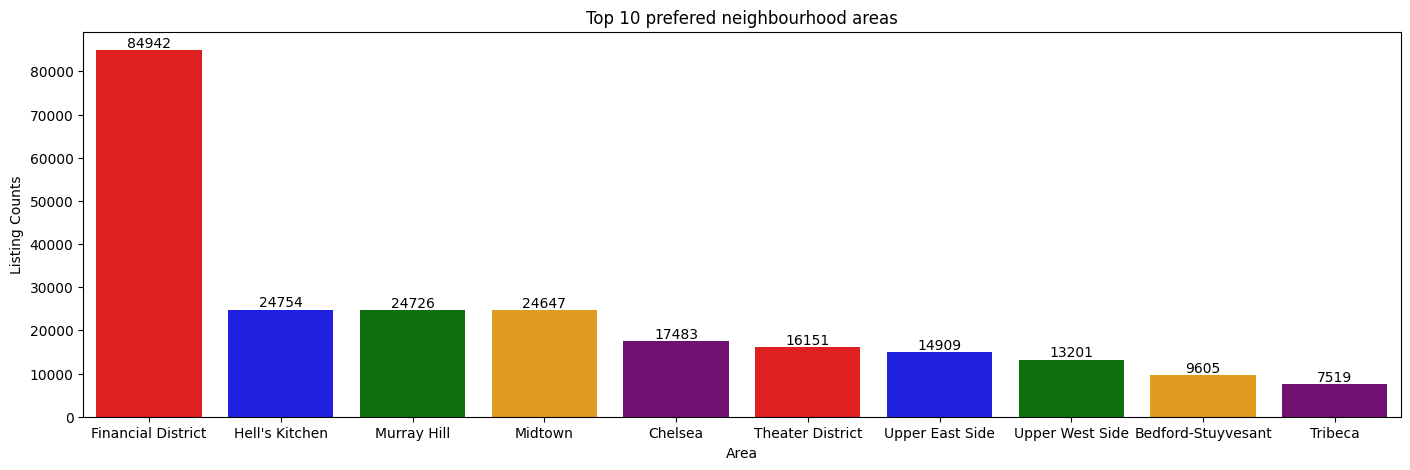

In [ ]:
# Chart - 2 visualization code
# As now we are having the price ranges with the most listings let us check the neighbourhoods with the most listings.

areas = []
area_listing = []
area_group = feature_df.groupby('neighbourhood')
for area, data in area_group:
    areas.append(area)
    area_listing.append(data['listings'].sum())

area_data_df = pd.DataFrame({
    "Area": areas,
    "Values": area_listing
})

area_data_df = area_data_df.sort_values(by='Values', ascending=False).reset_index(drop=True)
area_data_df
plt.figure(figsize=(17,5))
# plt.plot(groups,listings, color='black', marker = "o", markerfacecolor = 'blue', markeredgecolor='blue',linestyle='-')
colors = ['red', 'blue', 'green', 'orange', 'purple']
sns.barplot(x="Area", y='Values', data=area_data_df.head(10), hue="Area", palette=colors, legend=False)
plt.title('Top 10 prefered neighbourhood areas')
plt.xlabel('Area')
plt.ylabel('Listing Counts')
for x, y in zip(area_data_df['Area'].head(10), area_data_df['Values'].head(10)):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

**1. Why did you pick the specific chart?**

The bar chart clearly reflects the differece between the areas and the gap between them as per the listing counts, we can see the top ten most listed neighbourhoods.

**2. What is/are the insight(s) found from the chart?**

We can see that the most listed neighbourhood area is the 'Financial District' and it is also having a major gap between the other ones in the list, we can clearly see that the Financial District is the most prefered neighbourhood of our customers.


**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, as this insight suggests the areas where there is a great scope for business and we can create more opportunities and also increase our Advertisements in a more targetted manner

**Chart 3**

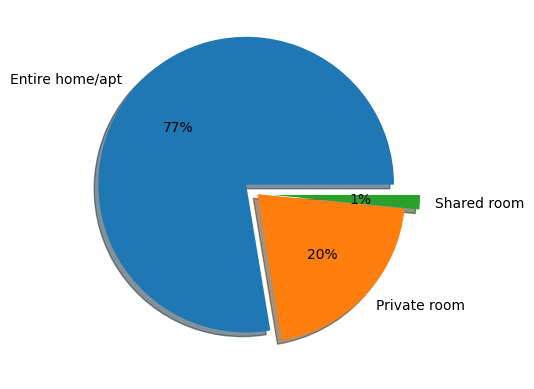

In [ ]:
# Chart - 3 visualization code
# Let's visualize the most prefered room type using a pie chart

room_feat_df # Our grouped df created earlier

# Plotting the data into a pie chart
plt.pie(room_feat_df['Listing Count'], labels=room_feat_df['Group'], autopct="%1i%%", explode=(0.1, 0, 0.1), shadow=True)
plt.show()

**1. Why did you pick the specific chart?**

As we were having only 3 types of rooms it was better to use a pie chart as it would be really easy to see the distribution of the listings on a pie chart and also to see the difference between the room types. In this we are also able to see the difference in percentage wich gave us a wider view on the data outcome.

**2. What is/are the insight(s) found from the chart?**
As we can clearly see that the "Entire Home/Apt" room type is the most prefered one, this clearly indicates that the people are prioritising their privacy and they would wanna stay all by themselves without having any type interference, as we see that the shared rooms are the least prefered, they are mostly prefered by the students that come from outside so that their accommodation can be affordable. This information can be easily used for more specific target approaches.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

As we are able to see what is prefered by the majority of our customer we will be able to spend money on advertisements more efficiently which will help us to minimize our cost wastage, not only for the majority as what sort of customers prefer the other room types, we will be able to target them with their needs which will increase our consumer market even in the low demand sectors, which can work as a decoy for us.

**Chart 4**

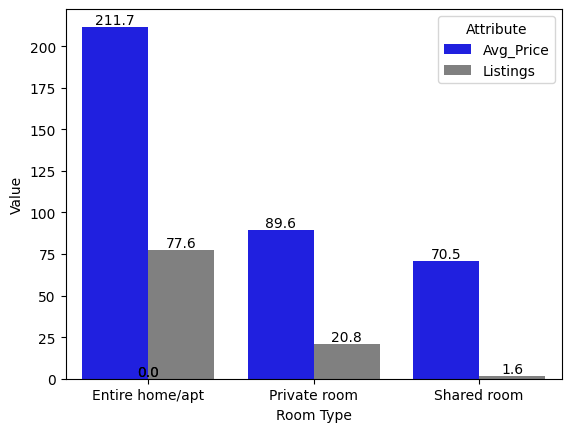

In [ ]:
# Chart - 4 visualization code
# Let us now visualize the average price division with room types.

data = {
    'Room Type': room_vs_price['Room Type'],
    'Avg_Price': room_vs_price['Avg_Price'],
    'Listings': ((room_feat_df['Listing Count']/room_feat_df['Listing Count'].sum())*100)
}

# Creating a DataFrame
df = pd.DataFrame(data)

df_melted = pd.melt(df, id_vars='Room Type', var_name='Attribute', value_name='Value')
# Creating a strip plot
sns.barplot(x='Room Type', y='Value', data=df_melted, hue="Attribute", palette=['blue', 'grey'], legend=True)

# Applying annotations on the values
for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

**1. Why did you pick the specific chart?**

As we are only having 3 types it was better to use the bar chart for better visualizing the divisions of the average price and the percentage of the listings divided among these values altogether.

**2. What is/are the insight(s) found from the chart?**

As we can clearly see that the relationship between the average pricing the listing counts is direct, the highest pricing is in the Entire Home/Apt room type, and slo the listings division, which can be quite using in making decisions like pricing.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, as we can see what percentage is ready to pay which amount for their preferences we will be able to make better pricing strategies which will definitely assist us in the growth.

**Chart 5**

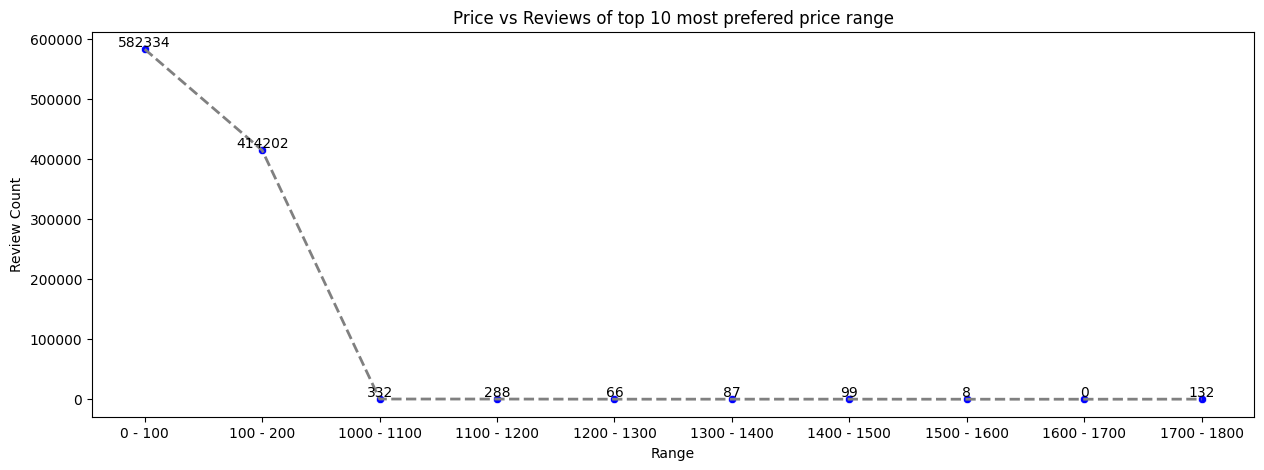

In [ ]:
# Chart - 5 visualization code
# Let's visualize the relationship between listing price and the number of reviews received.
# As we are having huge number of rows for this we will be taking only top 10 price ranges.
# For the listing prices we will take price_range

sorted_range = feature_df.sort_values(by='price_range', ascending=False)
sorted_range = sorted_range.groupby('price_range')
range_group = []
review_count = []
for range, data in sorted_range:
  range_group.append(range)
  review_count.append(data['number_of_reviews'].sum())

range_df = pd.DataFrame({
    'Range': range_group,
    'Review Count': review_count
})
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Range', y='Review Count', data=range_df.head(10), color='blue', legend=False, marker='o')
plt.plot(range_df['Range'].head(10), range_df['Review Count'].head(10), color='grey', linestyle='--', linewidth=2, label='Line Connecting Dots')
plt.title("Price vs Reviews of top 10 most prefered price range")
for x, y in zip(range_df['Range'].head(10), range_df['Review Count'].head(10)):
  plt.text(x, y, f'{y}', ha='center', va='bottom')

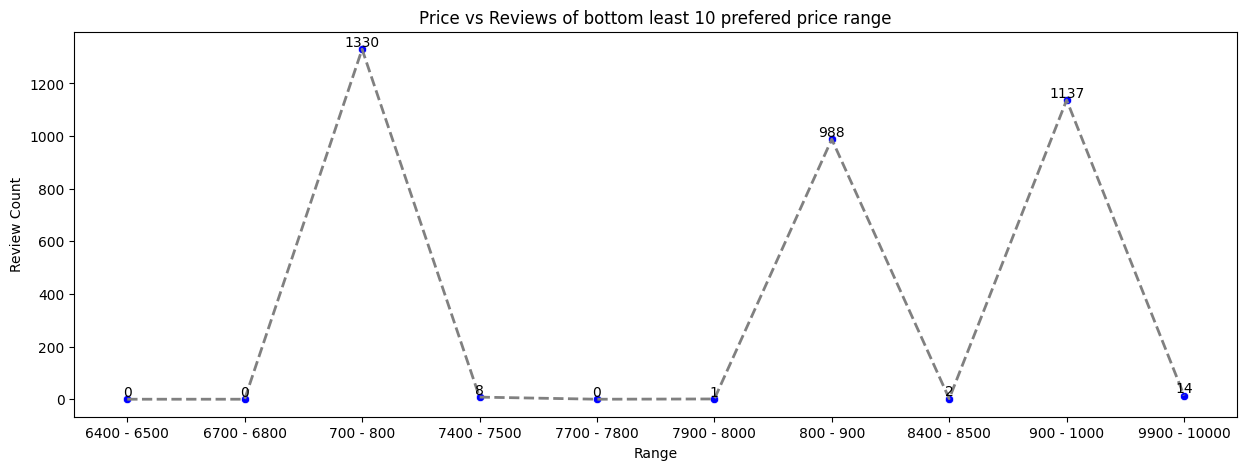

In [ ]:
# Let us also check for the least 10 prefered price ranges
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Range', y='Review Count', data=range_df.tail(10), color='blue', legend=False, marker='o')
plt.plot(range_df['Range'].tail(10), range_df['Review Count'].tail(10), color='grey', linestyle='--', linewidth=2, label='Line Connecting Dots')
plt.title("Price vs Reviews of bottom least 10 prefered price range")
for x, y in zip(range_df['Range'].tail(10), range_df['Review Count'].tail(10)):
  plt.text(x, y, f'{y}', ha='center', va='bottom')

**1. Why did you pick the specific chart?**

As the difference between the no. of reviews in the price range is very huge, using a plot chart is quiet handy so that the pointers can be seen clearly with respect to their values and also their differences.

**2. What is/are the insight(s) found from the chart?**

As we can see the price range and the no. of reviews are having inverse relationship, it cleary states that the budget of our majortiy customer base lies between the range 0 - 200.

We can also see that there are few preferences in the higher budget section as well where there is a competetion in the prices.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

This suggests that we will be able to make our pricing policies more targeted and more specific resulting in increasing customer base by providing them with the prices that are under their budget.

**Chart 6**

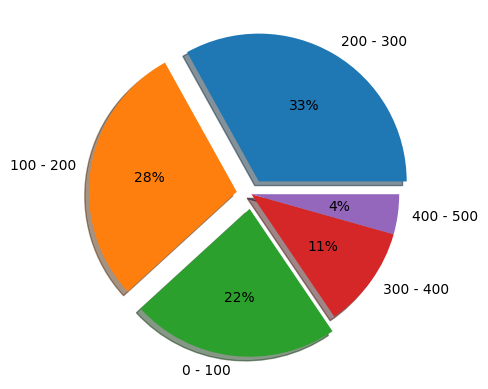

In [ ]:
# Chart - 6 visualization code
# Let us know the price range having the highest listings so as to get more specific idea on price preference.


sorted_range # Sorted Price Range grouped
range_group # List of all the price range groups
range_listing_count = []

for range, data in sorted_range:
  range_listing_count.append(data['listings'].sum())


range_list_df = pd.DataFrame({
    'Range': range_group,
    'Listing Count': range_listing_count
})

range_list_df = range_list_df.sort_values(by='Listing Count', ascending=False).reset_index(drop=True)

# We will be taking on the top 5 prefered ranges.
plt.pie(range_list_df['Listing Count'].head(), labels=range_list_df['Range'].head(), autopct="%1i%%", explode=(0.1, 0.1, 0.1, 0, 0), shadow=True)
plt.show()

**1. Why did you pick the specific chart?**

Pie chart is an effective chat to clearly see the distrubutions and preferences, it becomes easier to notice the division of listngs by the price range.

**2. What is/are the insight(s) found from the chart?**

As we can see form the chart:- The top 3 price ranges that are having the most listings are:-

200-300: 33%
100-200: 28%
0-100: 22%

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

We can see the number of listings are closely divided among these sectors and this can be a great was to keep a track of all the hostels that are within this price range and create recommendations according to their prefered neighbourhoods.

**Chart 7**

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

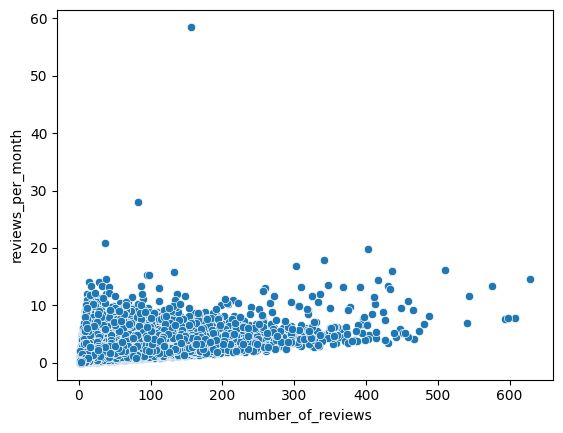

In [ ]:
# Chart - 7 visualization code
# Reviews vs Review per month
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=feature_df)

**1. Why did you pick the specific chart?**

In this case using a scatter plot can easily tell us the frequency, as we can see the review traffic is not that scattere and is rather collective.

**2. What is/are the insight(s) found from the chart?**

As we can clearly see that there is an outlier as well, however the relationship between the reviews and reviews per month is quiet direct which means that the customer are getting satisfied with the outcomes, where the number of review is higher and the host is also getting good reach towards consumer market.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

Yes as we can seek out the difference from the given reviews and make specific recommendations to our hosts about what changes can be done by them in order to increase their reach to the customers. This can be one of our premium services that can widely help our hosts.

**Chart 8**

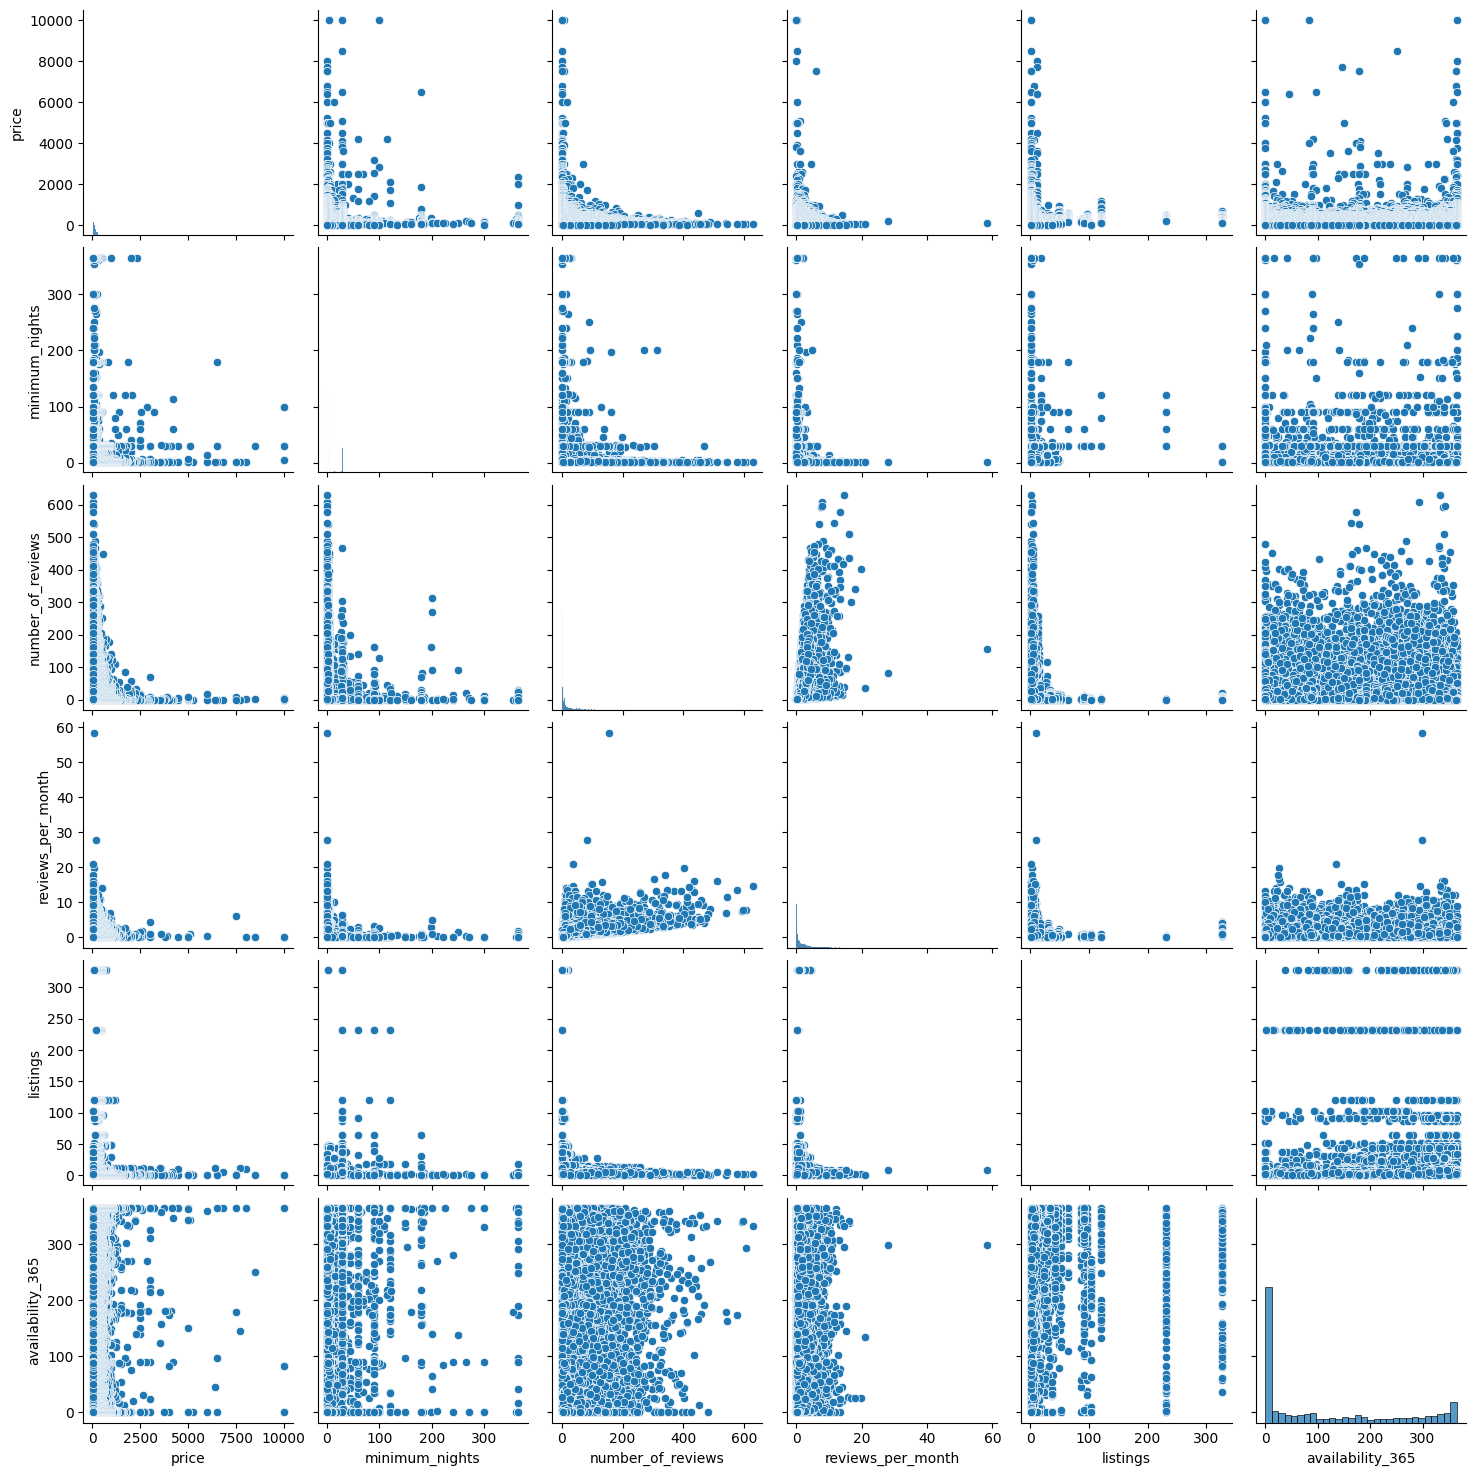

In [ ]:
# Chart - 8 visualization code
# Let's create a pairplot to know the relationship between our few variables.

pair_df = feature_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'listings', 'availability_365', 'price_range']]
sns.pairplot(pair_df)

**1. Why did you pick the specific chart?**

Here we can easily see the distribution of our numerical variables, it will also give us an overview of our dataset and the relationships between our variables.

**2. What is/are the insight(s) found from the chart?**

Yes, we can see that the utmost majority of our complete data set is within the price range of 0-2500.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

This insight can give us an overview of our dataset so that we can have an idea about the ranges of the numerical values in which we are required to work in, making it easier for us to get a direction of the area in which we need to work.

**Chart 9**

<Axes: >

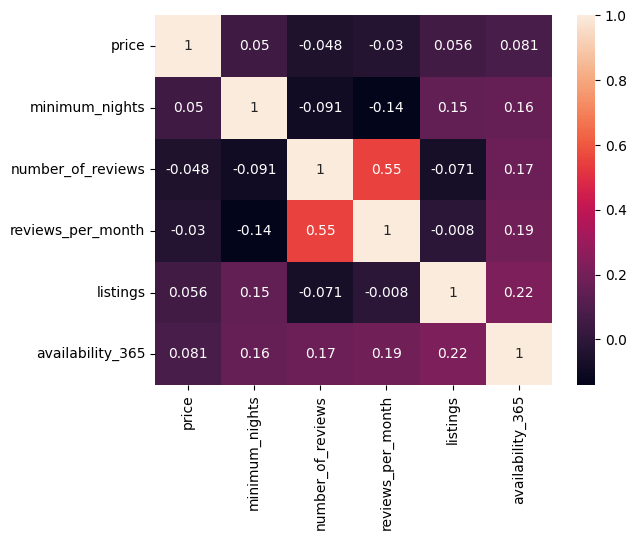

In [ ]:
# Chart - 9 visualization code
feature_df.describe()

# using corr() function to check the correlation between numeric columns.
corr_df = feature_df[['price', 'minimum_nights', 'number_of_reviews',
             'reviews_per_month', 'listings', 'availability_365']].corr()

# Visualizing correlation using seaborn heatmap, using annotations.
sns.heatmap(corr_df, annot=True)

**1. Why did you pick the specific chart?**

In order to check the correlation between numeric columns the heatmap is a really great option as it indicates the depth of each correlation with a different color, lighter to darker depending on the depth, not just that, it gives a proper one look visual about the data we want to check.

**2. What is/are the insight(s) found from the chart?**

This chart helped us to identify which pairs of variables have strong positive or negative correlations.

It also helped us understand which variables are most closely related to each other.

It even highlighted potential multicollinearity issues (high correlations between independent variables) if we plan to use regression analysis.

**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

Yes as using these factors we will get good assistance while creating the pedictive models, as this informations is really useful and important as it reflects the current standing of our business and also provides the possible oppourtunities in different areas.

#11. Solution to Business Objective

##What do you suggest the client to achieve Business Objective ?Explain Briefly.

Coming up to the solution of our business objective, we have throughly studied the whole data set and drawn some conclusions based on that, here are all the pointers we can take into consideration.

0-300 is the most prefered price range, which gives us a clear idea on what basis we will have to create our pricing.
Entire home/apt being the most prefered room type makes it obvious that customers are very much concerned about their privacy and safety, we can create more relevant policies regarding their safety and privacy, ulimately resulting in gaining their trust and creating goodwill.
We know that the most prefered area is the Financial District which is in the Manhattan Neighbourhood Group, hence we can create recommendations as per the pricing and area preferrences.
The most reviews are also given to the same area itself we can take into consideration those points which proved to be the most satisfying for our customers so that we can make such changes in the other neighbourhoods, if possible, whcih will result in getting us more business in the other areas as well.
I personally feel that this dataset should have one more column as per the occupation of the customer, it will create different groups of our customers based upon their occupation, which will help us to determine the preference of people coming from different sectors and we can identify which group of customers prefers which kind of accomodations.
This dataset also gave us a good idea on the budget of the majority of our consumer market, and now just that we were able to see the ratio of prefered pricing.
We were clearly able to see where most of our business lies and which consumer group creates the most of the business for us, we can make improvements in those and not just that we can also focus on the other sectors as well so that we can expand our business even more.

#12. Conclusion


The conclusion of this complete EDA project is simple and crisp, we have enough data to see what is liked by our customers and what is it that they are demanding as is is clear that around 90% of our business is saturated into one side whether it is the area preference or pricing, we can use that information to check what works for our customers and make those changes in other areas as well.